In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time, datetime
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='length', ylabel='Count'>

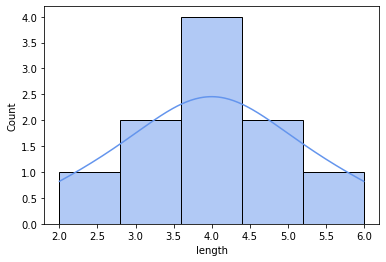

In [10]:
# 물고기 종 별 몸 길이 파일 불러오기
df = pd.read_csv('./dataset/4_fm2.csv')

# 몸 길이 데이터 추출하기
length_a = df.query("species=='A'")['length'] # 쿼리를 이용해 문구를 조건으로 추출해냈다
                                              # 물론 불린 인덱싱 써도 됩니당~
length_b = df.query("species=='B'")['length']

sns.histplot(length_a,color='cornflowerblue',kde=True) # kde: 확률 밀도 함수.
                                                       #같이 그리고 싶으면 True로

,length
count,10.000000
mean,4.000000
std,1.154701
min,2.000000
25%,3.250000
50%,4.000000
75%,4.750000
max,6.000000


,length
count,10.000000
mean,7.000000
std,1.154701
min,5.000000
25%,6.250000
50%,7.000000
75%,7.750000
max,9.000000


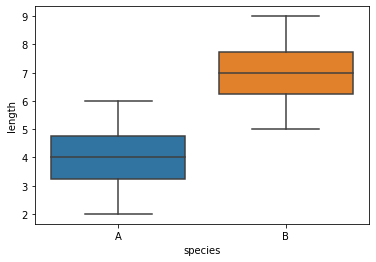

In [22]:
sns.boxplot(x='species',y='length',data=df)
display(df[df.species=='A'].describe(),df[df.species=='B'].describe())

<AxesSubplot:xlabel='species', ylabel='length'>

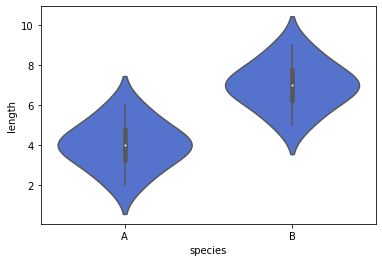

In [23]:
# 바이올린 플롯
sns.violinplot(x='species',y='length',data=df,color='royalblue')
# 분포와 데이터의 범위를 동시에 알 수 있음. 히스토그램과 박스플롯을 합친 모양?

<AxesSubplot:xlabel='species', ylabel='length'>

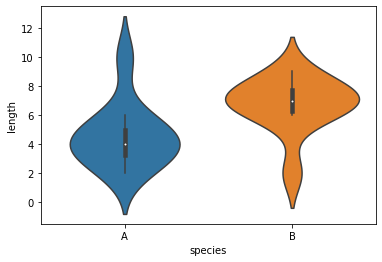

In [29]:
sns.violinplot(x='species',y='length',data=df1)

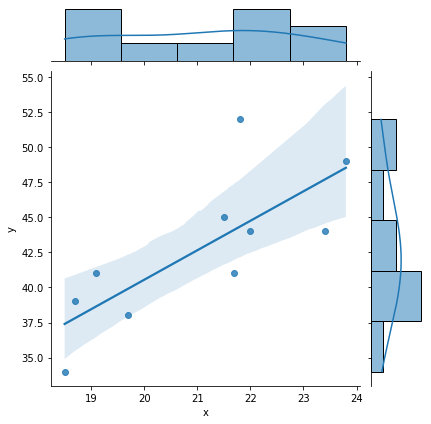

In [35]:
# joint plot 그리기
cov = pd.read_csv('./dataset/4_cov.csv')
sns.jointplot(cov.x,cov.y,kind='reg') # 회귀선 있는 모드

# 가져온 x와 y 값을 가지고 산점도를 만든 다음 최적의 회귀선을 그린다.
# 각 점에서 회귀선까지의 거리의 합이 최소가 되는 선임
# x,y에 대한 히스토그램과 확률밀도함수를 동시에 나타내어 상단(x)과 우측(y)에 표시

In [ ]:
# 회귀선 없는 모드
sns.jointplot(cov.x,cov.y)

In [37]:
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


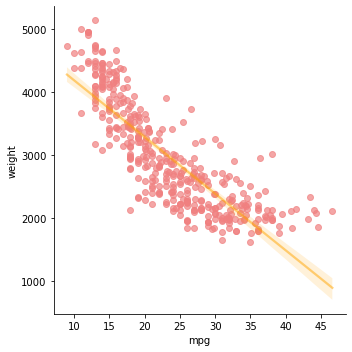

In [42]:
# linear model plot 선형모델플롯
sns.lmplot(x='mpg',y='weight',data=df_auto,
           scatter_kws={'color':'lightcoral','alpha':0.7},
          line_kws={'color':'orange','alpha':0.5}) # kws: keywards

<AxesSubplot:xlabel='mpg', ylabel='weight'>

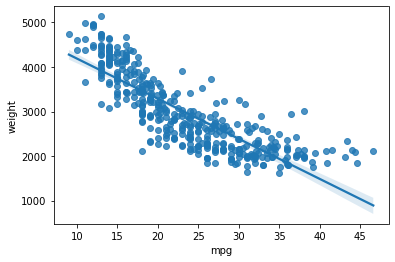

In [43]:
sns.regplot(x='mpg',y='weight',data=df_auto,fit_reg=True) # 회귀선 포함
# 위의 것이랑 같은 모양새라고 보면 됨

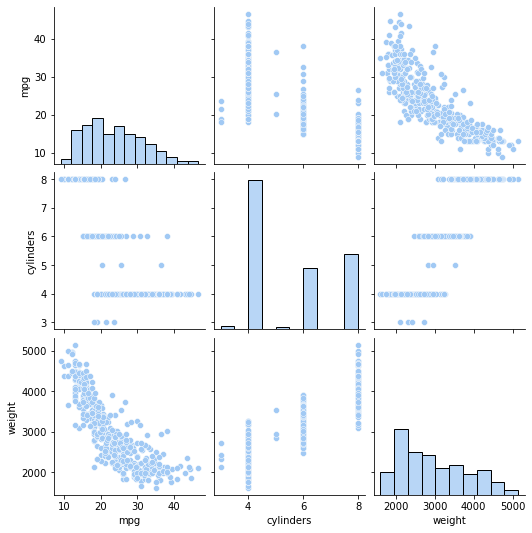

In [48]:
df2=df_auto[['mpg','cylinders','weight']]
sns.set_palette('pastel')
sns.pairplot(df2,palette='pastel') # 팔레트는 하나의 색상 세트라고 보면 됨

Text(0.5, 1.0, 'Heatmap of the Dataset')

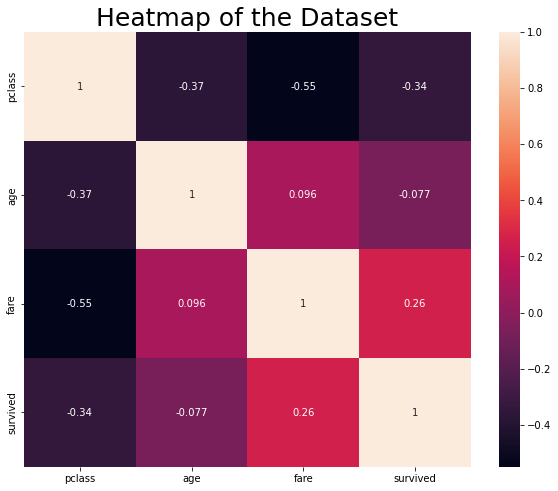

In [52]:
tdf = sns.load_dataset('titanic')
plt.figure(figsize=(10,8))
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=25)

<AxesSubplot:xlabel='None-class', ylabel='sex'>

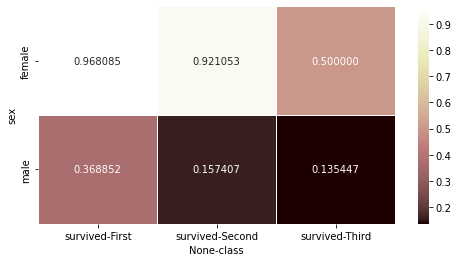

In [60]:
table = tdf.pivot_table(index=['sex'],columns=['class'],values=['survived'],aggfunc='mean')
plt.figure(figsize=(8,4))
sns.heatmap(table,annot=True,
           fmt='f',cmap='pink',
           linewidth=.5, cbar=True)

<AxesSubplot:xlabel='species', ylabel='length'>

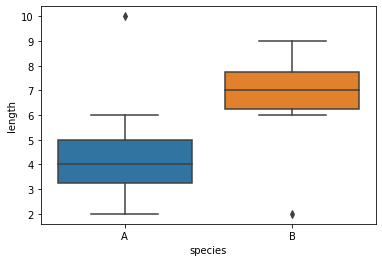

In [28]:
# [과제] 박스플롯을 그리고, 만들어낸 이상치를 확인해 보자.
df1 = df.copy()
df1.iloc[5,1] = 10
df1.iloc[10,1] = 2
sns.boxplot(x ='species',y='length',data=df1)